# 最小二乘法

对于数据$(x_i, y_i)(i=1, 2, 3...,m)$

拟合出函数$h(x)$

有误差，即残差：$r_i=h(x_i)-y_i$

此时L2范数(残差平方和)最小时，h(x) 和 y 相似度最高，更拟合

一般的H(x)为n次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$

$w(w_0,w_1,w_2,...,w_n)$为参数

最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ 使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小

即，求 $min\sum_{i=1}^n(h(x_i)-y_i)^2$

----

举例：使用最小二乘法拟和$y=sin(2\pi x)$曲线

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

#多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

#残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

*ps: numpy.poly1d([1,2,3])  生成  $1x^2+2x^1+3x^0$*

In [4]:
#10 data point
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
#加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]

def fitting(M=0):
    """
    M 为多项式系数
    """
    #随机初始化多项式参数
    p_init = np.random.rand(M+1)
    #最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    
    """
    leastsq(func, x0, args=())
        leastsq介绍:https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.leastsq.html
    func 是自定义的一个计算误差的函数 
    x0 是计算的初始参数值
    args 是指定func的其他参数 
    """
    
    #可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='data point')
    plt.legend() #显示label
    return p_lsq

(array([0.03338581]), 1)

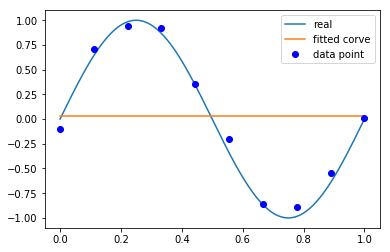

In [8]:
# M = 0
p_lsq_0 = fitting(M=0)
p_lsq_0

(array([-1.24812269,  0.65744715]), 1)

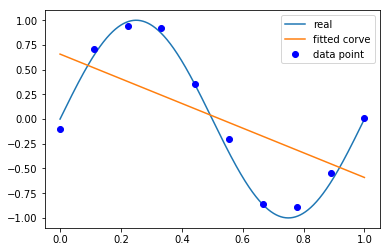

In [9]:
# M = 1
p_lsq_1 = fitting(M=1)
p_lsq_1

(array([ 21.02559173, -31.86573594,  11.04564269,  -0.11785948]), 1)

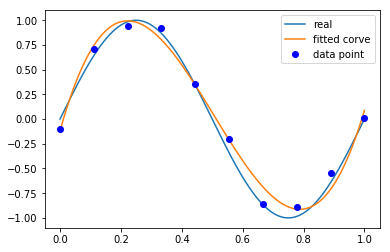

In [10]:
# M = 3
p_lsq_3 = fitting(M=3)
p_lsq_3

(array([ 2.65883087e+04, -1.19492335e+05,  2.25755254e+05, -2.33037179e+05,
         1.42853137e+05, -5.27943585e+04,  1.13621327e+04, -1.30064684e+03,
         6.57982856e+01, -1.04407927e-01]), 2)

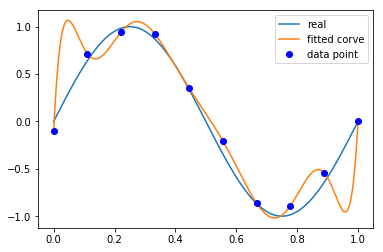

In [11]:
# M = 9
p_lsq_9 = fitting(M=9)
p_lsq_9

当M=9时，多项式曲线通过了每个数据点，但是造成了过拟合




# 正则化

结果显示过拟合，引入正则化项(regularizer)，降低过拟合

$Q(x)=\sum_{i=1}^n(h(x_i)-y_i)^2+\lambda||w||^2$。

回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。

- L1: regularization\*abs(p)

- L2: 0.5 \* regularization \* np.square(p)

In [27]:
lamtha = 0.0001

def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, lamtha*np.linalg.norm(p,ord=2))# L2范数作为正则化项
    return ret

In [28]:
# 最小二乘法。加正则化项
p_init = np.random.rand(9+1)
p_lsq_regularization = leastsq(residuals_func_regularization, p_init, args=(x, y))

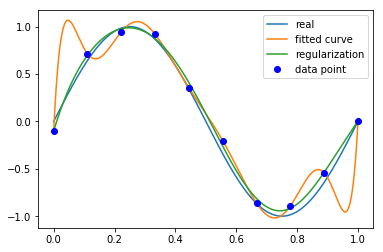

In [29]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label='regularization')
plt.plot(x, y, 'bo', label='data point')
plt.legend()